In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

from  pathlib import Path
import projet3


def get_metrics(data, codes, columns):
    sum_ = data[columns].sum()
    return sum_
    

In [2]:
# les colonnes retenues
columns = ['fat_100g', 'saturated-fat_100g', 'sugars_100g', 
           'carbohydrates_100g', 'proteins_100g','salt_100g',  
           'sodium_100g', 'calcium_100g', 'cholesterol_100g',
           'trans-fat_100g', 'iron_100g', 'vitamin-c_100g','vitamin-a_100g']

In [3]:
data_folder = Path(projet3.__file__).with_name("data")
results_folder = Path(projet3.__file__).with_name("results")

data = data_folder / "en.openfoodfacts.org.products.csv"
data_df = pd.read_csv(data.as_posix(), sep="\t")

/Users/alisaidomar/openclassroom_projet3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data_df.head(10)
sample = data_df.sample(10)
codes = sample["code"]
sum_ = sample.sum()

# Analyse de la composition d'un repas, composé de plusiuers produits

In [13]:
metrics = get_metrics(sample, codes=list(codes), columns=columns)

print(metrics.index)
print(metrics.values)


Index(['fat_100g', 'saturated-fat_100g', 'sugars_100g', 'carbohydrates_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'calcium_100g',
       'cholesterol_100g', 'trans-fat_100g', 'iron_100g', 'vitamin-c_100g',
       'vitamin-a_100g'],
      dtype='object')
[9.33333333e-01 6.66666667e-03 9.00000000e-01 2.67333333e+01
 4.33000000e+00 3.33333333e-03 1.33333333e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


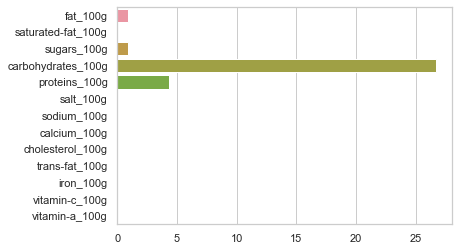

In [15]:
sns.set_color_codes("pastel")
sns.set(style="whitegrid")
sns.barplot(y=metrics.index, x=metrics.values)


